### 任务目标 运行一维中的梯度下降的代码，注意以下点的变化 
- 1.时间
- 2.导数
- 3.损失值
- 4.当前的局部最小值

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

# 定义x 的取值范围
x = np.linspace(-2, 2, 2001)


###  一.使用固定的学习率

In [2]:
# 从x中随机选择一个作为初始的局部最小值
localmin = np.random.choice(x, 1)

# 存储初始值
initval = localmin[:] 

learning_rate = .01
training_epoches = 50

modelparamsFixed = np.zeros((training_epoches, 3))

for i in range(training_epoches):
    # 计算当前点的梯度
    grad = deriv(localmin)

    lr = learning_rate

    localmin = localmin - lr * grad
    # print(modelparamsFixed[i])
    modelparamsFixed[i,:] = localmin[0],grad[0],lr
    # print(localmin,grad,lr)
    # print(modelparamsFixed[i,:])

### 二. 基于梯度动态变化的学习率 

In [3]:
# 从x中随机选择一个作为初始的局部最小值
localmin = np.random.choice(x, 1)
initval = localmin[:]

learning_rate = .01
training_epoches = 50

modelparamsGrad= np.zeros((training_epoches,3))

for i in range(training_epoches):
    # 计算当前点的梯度
    grad = deriv(localmin)

    # 根据梯度调整学习率
    lr = learning_rate*np.abs(grad)

    localmin = localmin - lr * grad

    # print(localmin,grad,lr)
    modelparamsGrad[i,:] =localmin[0],grad[0],lr[0]


### 三. 基于训练次数调整的学习率

In [4]:
# 从x中随机选择一个作为初始的局部最小值
localmin = np.random.choice(x, 1)
# 拷贝一份

learning_rate = .1
training_epoches = 50 

modelparamsTimes = np.zeros((training_epoches, 3))

for i in range(training_epoches):
    # 计算当前点的梯度
    grad = deriv(localmin)

    # 根据训练次数调整学习率
    lr = learning_rate*(1-(i+1)/training_epoches)
    localmin = localmin - lr * grad
    modelparamsTimes[i, :] = localmin[0], grad[0], lr

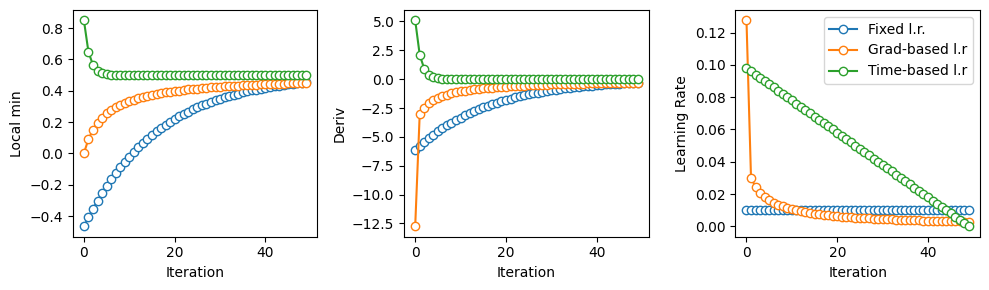

In [5]:

fig,ax = plt.subplots(1, 3, figsize=(10, 3))

for i in range(3):
    ax[i].plot(modelparamsFixed[:, i], 'o-', markerfacecolor="w")
    ax[i].plot(modelparamsGrad[:, i], 'o-', markerfacecolor="w")
    ax[i].plot(modelparamsTimes[:, i], 'o-', markerfacecolor="w")
    ax[i].set_xlabel('Iteration')


ax[0].set_ylabel('Local min')
ax[1].set_ylabel('Deriv')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed l.r.', 'Grad-based l.r', 'Time-based l.r'])

plt.tight_layout()
plt.show() 

### 总结
几种常用靠谱的调整学习率的方法
- 1. 调整训练次数
- 2. 根据导数
- 3. 损失函数 当损失值在[0,1]范围内才可用
